In [22]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/datasets and projects/drug_dataset.csv")

#--- Inspect data ---
df

,Age,Sex,BP,Cholesterol,Allergy,Na_to_K,Medication_Duration,Drug
0,23,F,HIGH,HIGH,Pollen,25.355,40,DrugY
1,47,M,LOW,HIGH,NaN,13.093,25,drugC
2,47,M,LOW,HIGH,Peanuts,10.114,25,drugC
3,28,F,NORMAL,HIGH,Shellfish,7.798,120,drugX
4,61,F,LOW,HIGH,Pollen,18.043,40,DrugY
...,...,...,...,...,...,...,...,...
234,35,M,NORMAL,NORMAL,NaN,7.845,40,drugX
235,47,M,LOW,NORMAL,NaN,33.542,25,DrugY
236,32,F,NORMAL,HIGH,NaN,7.477,25,drugX
237,70,F,NORMAL,HIGH,Pollen,20.489,120,DrugY


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
sumofnull = df.isnull().sum()
sumofnull

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Allergy,149
Na_to_K,0
Medication_Duration,0
Drug,0


In [24]:
dtype = df.dtypes
dtype

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Allergy,object
Na_to_K,float64
Medication_Duration,int64
Drug,object


In [25]:
describe = df.describe()
describe

,Age,Na_to_K,Medication_Duration
count,239.000000,239.000000,239.000000
mean,43.669456,16.263845,47.531381
std,16.612854,7.248121,32.786777
min,15.000000,6.269000,25.000000
25%,30.500000,10.571000,25.000000
50%,43.000000,13.967000,40.000000
75%,58.000000,20.251000,40.000000
max,74.000000,38.247000,120.000000


In [26]:
target_count = df["Drug"].value_counts()
target_count

,count
Drug,
DrugY,111
drugX,61
drugA,29
drugB,20
drugC,18


In [27]:
duplicates = df.duplicated().sum()
duplicates

4

In [28]:
df = df.drop_duplicates()
df

,Age,Sex,BP,Cholesterol,Allergy,Na_to_K,Medication_Duration,Drug
0,23,F,HIGH,HIGH,Pollen,25.355,40,DrugY
1,47,M,LOW,HIGH,NaN,13.093,25,drugC
2,47,M,LOW,HIGH,Peanuts,10.114,25,drugC
3,28,F,NORMAL,HIGH,Shellfish,7.798,120,drugX
4,61,F,LOW,HIGH,Pollen,18.043,40,DrugY
...,...,...,...,...,...,...,...,...
233,66,M,HIGH,HIGH,Peanuts,16.347,25,DrugY
234,35,M,NORMAL,NORMAL,NaN,7.845,40,drugX
236,32,F,NORMAL,HIGH,NaN,7.477,25,drugX
237,70,F,NORMAL,HIGH,Pollen,20.489,120,DrugY


In [29]:
data = df.copy()
data.drop(["Allergy","Medication_Duration"], axis=1, inplace=True)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
233,66,M,HIGH,HIGH,16.347,DrugY
234,35,M,NORMAL,NORMAL,7.845,drugX
236,32,F,NORMAL,HIGH,7.477,drugX
237,70,F,NORMAL,HIGH,20.489,DrugY


In [30]:
def get_age_group(age):

  if age <= 30:
    return "0-30"
  elif age <= 40:
    return "30-40"
  elif age <= 50:
    return "40-50"
  elif age <= 60:
    return "50-60"
  else:
    return "60+"
data["AgeGroup"] = data["Age"].apply(get_age_group)
data.drop(["Age"], axis=1, inplace=True)
data

,Sex,BP,Cholesterol,Na_to_K,Drug,AgeGroup
0,F,HIGH,HIGH,25.355,DrugY,0-30
1,M,LOW,HIGH,13.093,drugC,40-50
2,M,LOW,HIGH,10.114,drugC,40-50
3,F,NORMAL,HIGH,7.798,drugX,0-30
4,F,LOW,HIGH,18.043,DrugY,60+
...,...,...,...,...,...,...
233,M,HIGH,HIGH,16.347,DrugY,60+
234,M,NORMAL,NORMAL,7.845,drugX,30-40
236,F,NORMAL,HIGH,7.477,drugX,30-40
237,F,NORMAL,HIGH,20.489,DrugY,60+


In [31]:
def get_na_to_k_group(value):
  if value <= 10:
    return "5-10"
  elif value <= 15:
    return "10-15"
  elif value <= 20:
    return "15-20"
  elif value <= 25:
    return "20-25"
  elif value <= 30:
    return "25-30"
  else:
    return "30+"

data["Na_to_K_groups"] = data["Na_to_K"].apply(get_na_to_k_group)
data.drop(["Na_to_K"], axis=1, inplace=True)
data


,Sex,BP,Cholesterol,Drug,AgeGroup,Na_to_K_groups
0,F,HIGH,HIGH,DrugY,0-30,25-30
1,M,LOW,HIGH,drugC,40-50,10-15
2,M,LOW,HIGH,drugC,40-50,10-15
3,F,NORMAL,HIGH,drugX,0-30,5-10
4,F,LOW,HIGH,DrugY,60+,15-20
...,...,...,...,...,...,...
233,M,HIGH,HIGH,DrugY,60+,15-20
234,M,NORMAL,NORMAL,drugX,30-40,5-10
236,F,NORMAL,HIGH,drugX,30-40,5-10
237,F,NORMAL,HIGH,DrugY,60+,20-25


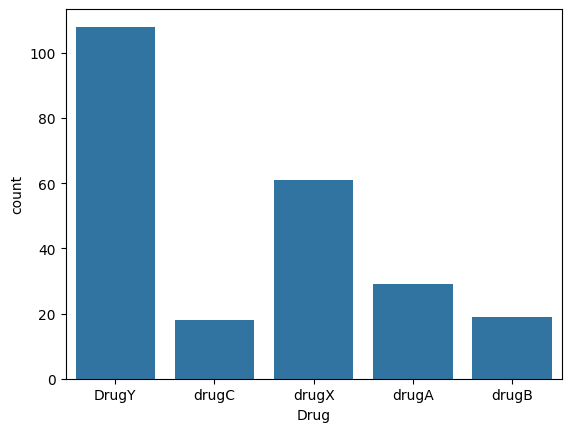

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
drug_ax = sns.countplot(x= "Drug" , data= data)
plt.show()

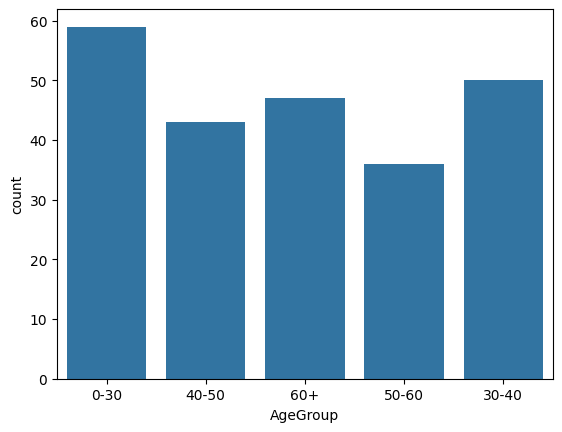

In [33]:
agegrp_ax = sns.countplot(x = "AgeGroup", data = data)
plt.show()

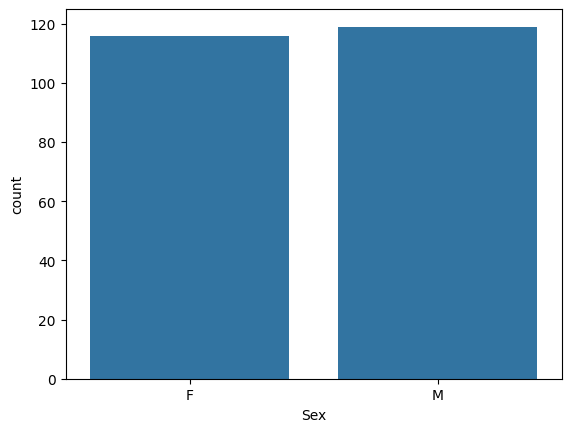

In [34]:
sex_ax = sns.countplot(x = "Sex", data = data)
plt.show()

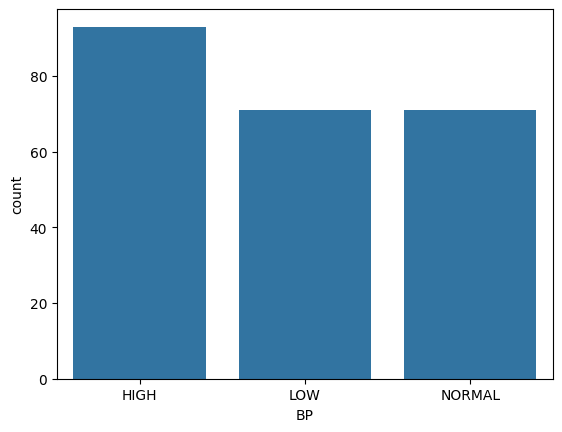

In [35]:
bp_ax = sns.countplot(x="BP", data=data)
plt.show()

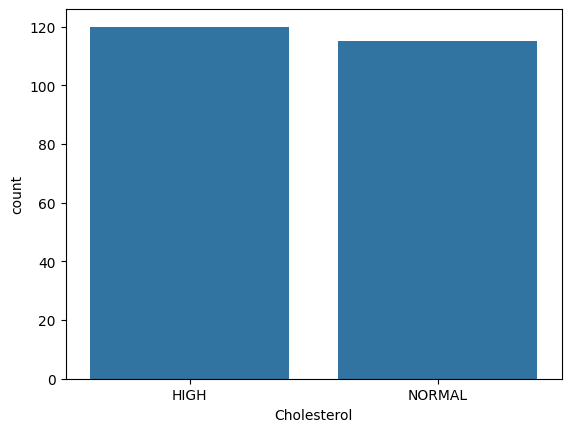

In [36]:
cholestrol_ax = sns.countplot(x="Cholesterol", data=data)
plt.show()

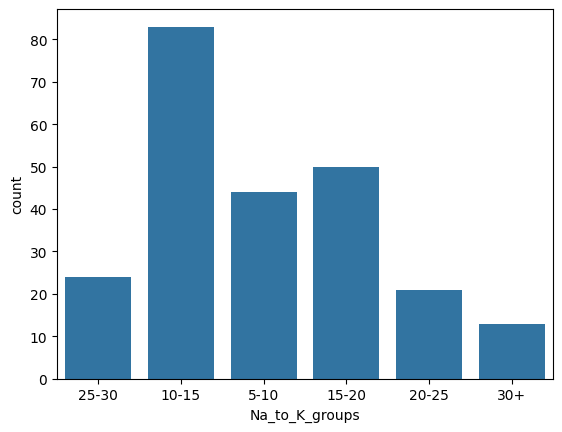

In [37]:
na_ax  = sns.countplot(x="Na_to_K_groups", data=data)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X = data.drop("Drug", axis=1)
y = data["Drug"]
x_train, x_test, y_train, y_test   = train_test_split(X,y ,
                                   random_state=4,
                                   test_size=0.20,
                                   shuffle=True)

x_train, x_test, y_train, y_test

(    Sex      BP Cholesterol AgeGroup Na_to_K_groups
 217   F    HIGH      NORMAL     0-30          15-20
 150   M    HIGH      NORMAL    40-50           5-10
 34    M  NORMAL        HIGH    50-60          10-15
 223   F    HIGH      NORMAL    30-40          10-15
 82    F     LOW        HIGH    30-40           5-10
 ..   ..     ...         ...      ...            ...
 129   F  NORMAL        HIGH    30-40           5-10
 197   M  NORMAL        HIGH    50-60           5-10
 183   F    HIGH      NORMAL    30-40          15-20
 174   M    HIGH      NORMAL    40-50          10-15
 122   M  NORMAL        HIGH    30-40          20-25
 
 [188 rows x 5 columns],
     Sex      BP Cholesterol AgeGroup Na_to_K_groups
 63    M     LOW      NORMAL    40-50           5-10
 143   M    HIGH      NORMAL      60+          15-20
 169   F    HIGH        HIGH     0-30          10-15
 69    F    HIGH      NORMAL     0-30          20-25
 133   M  NORMAL        HIGH     0-30          25-30
 118   F    HIGH   

In [39]:

from imblearn.over_sampling import SMOTE
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
# Align x_test columns with x_train to ensure consistency
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
# Ensure the data types of features in both sets are integers
x_train = x_train.astype(int)
x_test = x_test.astype(int)
# Apply SMOTE to balance class distribution in the training set
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
x_train, x_test, y_train

(     Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
 0        1      0        1       0          0                 0   
 1        0      1        1       0          0                 0   
 2        0      1        0       0          1                 1   
 3        1      0        1       0          0                 0   
 4        1      0        0       1          0                 1   
 ..     ...    ...      ...     ...        ...               ...   
 420      1      0        0       0          1                 1   
 421      1      0        0       1          0                 0   
 422      1      0        0       0          1                 1   
 423      1      0        0       1          0                 0   
 424      1      0        0       0          1                 1   
 
      Cholesterol_NORMAL  AgeGroup_0-30  AgeGroup_30-40  AgeGroup_40-50  \
 0                     1              1               0               0   
 1                     1        

In [41]:

from imblearn.over_sampling import SMOTE

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
# Align x_test columns with x_train to ensure consistency
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
# Ensure the data types of features in both sets are integers
x_train = x_train.astype(int)
x_test = x_test.astype(int)
# Apply SMOTE to balance class distribution in the training set
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)
# The training set (x_train, y_train) is now balanced, and testing set (x_test, y_test) is ready for evaluation.
x_train, x_test, y_train

(     Sex_F  Sex_M  BP_HIGH  BP_LOW  BP_NORMAL  Cholesterol_HIGH  \
 0        1      0        1       0          0                 0   
 1        0      1        1       0          0                 0   
 2        0      1        0       0          1                 1   
 3        1      0        1       0          0                 0   
 4        1      0        0       1          0                 1   
 ..     ...    ...      ...     ...        ...               ...   
 420      1      0        0       0          1                 1   
 421      1      0        0       1          0                 0   
 422      1      0        0       0          1                 1   
 423      1      0        0       1          0                 0   
 424      1      0        0       0          1                 1   
 
      Cholesterol_NORMAL  AgeGroup_0-30  AgeGroup_30-40  AgeGroup_40-50  \
 0                     1              1               0               0   
 1                     1        

In [59]:
#--- Import LogisticRegression ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

reg = LogisticRegression()
# train the model using the training sets
reg.fit(x_train, y_train)

# making predictions on the testing set
y_pred = reg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy,precision,recall,f1

(1.0, 1.0, 1.0, 1.0)

In [60]:
#--- Import GaussianNB ---
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test,y_pred, average='weighted')
accuracy,precision,recall,f1

(1.0, 1.0, 1.0, 1.0)

In [63]:
#--- Import DecisionTreeClassifier ---

from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test,y_pred, average='weighted')
accuracy,precision,recall,f1

(0.9574468085106383,
 0.9639934533551554,
 0.9574468085106383,
 0.9582527401676336)

In [65]:
#--- Import RandomForestClassifier ---
from sklearn.ensemble import RandomForestClassifier
classifierf= RandomForestClassifier(n_estimators= 100, max_features= 3, criterion="entropy")
classifierf.fit(x_train, y_train)
y_pred = classifierf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')
f1 = f1_score(y_test,y_pred, average='weighted')
accuracy,precision,recall,f1

(0.9361702127659575,
 0.9592198581560283,
 0.9361702127659575,
 0.9415757949522983)

In [66]:
models_metrics = {
    "model_1": {"accuracy": 1.0, "precision": 1.0, "recall": 1.0, "f1_score": 1.0},
    "model_2": {"accuracy": 1.0, "precision": 1.0, "recall": 1.0, "f1_score": 1.0},
    "model_3": {"accuracy": 0.95, "precision": 0.96, "recall": 0.95, "f1_score": 0.95},
    "model_4": {"accuracy": 0.93, "precision": 0.95, "recall": 0.93, "f1_score": 0.94}
}

# Determine the best model based on F1-score as the priority metric
best_model_name = max(models_metrics, key=lambda x: models_metrics[x]["f1_score"])
print(f"Best model based on F1-score: {best_model_name}")

# Mock dictionary of models (replace with actual models)
models = {
    "model_1": reg,  # Replace with actual model instance
    "model_2": gnb,
    "model_3": classifier,
    "model_4": classifierf
}

# Select the best model
best_model = models[best_model_name]

sample_data = pd.DataFrame([[1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0]],
                    columns=['Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH', 'Cholesterol_NORMAL', 'AgeGroup_0-30',
                             'AgeGroup_30-40', 'AgeGroup_40-50', 'AgeGroup_50-60', 'AgeGroup_60+', 'Na_to_K_groups_10-15', 'Na_to_K_groups_15-20',
                             'Na_to_K_groups_20-25', 'Na_to_K_groups_25-30', 'Na_to_K_groups_30+', 'Na_to_K_groups_5-10'])

# Assuming the model has been trained and implements a `predict` method
if best_model:
    prediction = best_model.predict(sample_data)
else:
    prediction = "No model available for prediction."

prediction


Best model based on F1-score: model_1


array(['DrugY'], dtype=object)